
**Advance Machine Learning Project- Sign Detection**



## Importing the libraries

In [24]:
from time import time  # we are importing the time function for the time module

import numpy as np    # we are using the numpy library for numerical  calculation
import pandas as pd   # we are using pandas for the data analysis
import matplotlib.pyplot as plt # we are using pandas for visualization

import tensorflow as tf # we are importing the machine learning tensorflow model as tf
from tensorflow import keras  # we are importing the Deep learning  API keras
from tensorflow.keras import layers # layers from keras for Neural network layers
from tensorflow.keras.models import Sequential # we are using sequential for Model creation
from tensorflow.keras.preprocessing import image # we are imorting Image processing libraries
from tensorflow.keras.callbacks import EarlyStopping # we are using early stop function to reduce computation

# Creating the Function to for Ploting the History of the model

In [25]:
def graph_display(history):  #we have created the function for called graph_display for ploting the history
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Train Acc')
    plt.plot(range(len(val_acc)), val_acc, label='Val_Acc')
    plt.legend(loc='lower right')
    plt.title('Train & Val--Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Train Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Train & val -- Loss')
    plt.show()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
Bt_size = 32
height = 48 #48
width = 48 #48
epoch = 25
train_folder = "/content/drive/MyDrive/Images/Train"
val_folder ="/content/drive/MyDrive/Images/Test"
time_record = {}
time_acc = {}
time_par = {}

In [35]:
trn_path = tf.keras.utils.image_dataset_from_directory(
  train_folder ,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(height, width),
  batch_size=Bt_size)

val_path = tf.keras.utils.image_dataset_from_directory(
  val_folder,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=Bt_size)

name_train = trn_path.class_names

Found 7036 files belonging to 7 classes.
Using 6333 files for training.
Found 3510 files belonging to 7 classes.
Using 351 files for validation.


In [36]:
import os
for name in os.listdir('/content/drive/MyDrive/Images/Train'):
    count=[]
    for name_class in os.listdir('/content/drive/MyDrive/Images/Train'+'/'+name):
        count.append(name_class)
    print("Class name:",name,len(count))


Class name: Thank You 1000
Class name: More 1000
Class name: Yes 1000
Class name: All Done 1000
Class name: Please 1000
Class name: No 1017
Class name: Stop 1019


optional

In [37]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def func(path):
# Load the input image
    img = load_img(path)

    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    # Configure the ImageDataGenerator
    datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.15,
            height_shift_range=0.15,
            shear_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest')

    # Generate 10 augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/Images/Train/update_disgust',
                            save_prefix='aug_image',
                            save_format='jpg'):
        i += 1
        if i > 9:
            break


In [38]:
for name in os.listdir('/content/drive/MyDrive/Images/Train'):
    count=[]
    for name_class in os.listdir('/content/drive/MyDrive/Images/Train'+'/'+name):
        count.append(name_class)
    print("Class name:",name,len(count))

Class name: Thank You 1000
Class name: More 1000
Class name: Yes 1000
Class name: All Done 1000
Class name: Please 1000
Class name: No 1017
Class name: Stop 1019


In [ ]:
#start from here

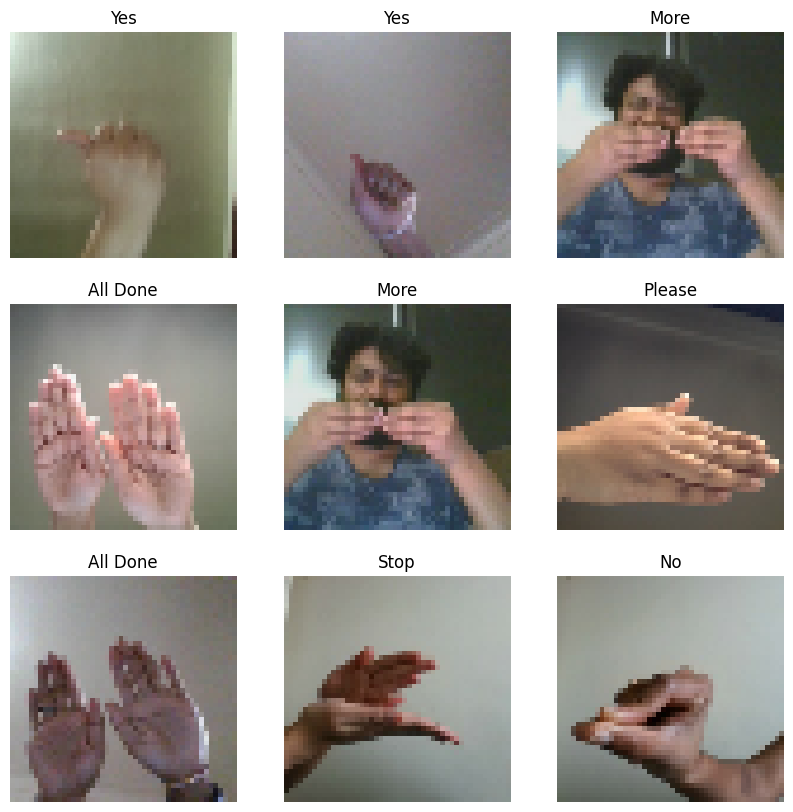

In [39]:
from pathlib import Path
import imghdr
plt.figure(figsize=(10, 10))
for images, labels in trn_path.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint32"))
    plt.title(name_train[labels[i]])
    plt.axis("off")

In [40]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_3 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)       

In [41]:
start = time()

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=epoch
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")


time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/25
198/198 [==============================] - 141s 703ms/step - loss: 0.1374 - acc: 0.9728 - val_loss: 11.5854 - val_acc: 0.1453
Epoch 2/25
198/198 [==============================] - 57s 286ms/step - loss: 0.0041 - acc: 0.9989 - val_loss: 5.0243 - val_acc: 0.5641
Epoch 3/25
198/198 [==============================] - 57s 288ms/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.2312 - val_acc: 0.8889
Epoch 4/25
198/198 [==============================] - 55s 274ms/step - loss: 9.5236e-05 - acc: 1.0000 - val_loss: 0.0347 - val_acc: 0.9915
Epoch 5/25
198/198 [==============================] - 55s 277ms/step - loss: 9.8642e-05 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.9972
Epoch 6/25
198/198 [==============================] - 57s 286ms/step - loss: 2.5364e-05 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 7/25
198/198 [==============================] - 59s 297ms/step - loss: 4.3913e-05 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9972
Epoch 8/25
198/198 [=================

In [42]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

11/11 [==============================] - 1s 52ms/step - loss: 8.9283e-04 - acc: 1.0000
Validation Accuracy: 100.00%


In [46]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)       

In [48]:
start = time()

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=epoch
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")


time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/25
198/198 [==============================] - 59s 287ms/step - loss: 0.1855 - acc: 0.9517 - val_loss: 12.4829 - val_acc: 0.1453
Epoch 2/25
198/198 [==============================] - 57s 288ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 10.0174 - val_acc: 0.1453
Epoch 3/25
198/198 [==============================] - 57s 285ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 2.5523 - val_acc: 0.5783
Epoch 4/25
198/198 [==============================] - 58s 292ms/step - loss: 0.0099 - acc: 0.9964 - val_loss: 0.3561 - val_acc: 0.9145
Epoch 5/25
198/198 [==============================] - 58s 289ms/step - loss: 0.0260 - acc: 0.9931 - val_loss: 0.0611 - val_acc: 0.9772
Epoch 6/25
198/198 [==============================] - 57s 284ms/step - loss: 0.0036 - acc: 0.9994 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 7/25
198/198 [==============================] - 56s 281ms/step - loss: 9.2148e-04 - acc: 0.9997 - val_loss: 0.0888 - val_acc: 0.9573
Epoch 8/25
198/198 [=============================

In [49]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

11/11 [==============================] - 3s 144ms/step - loss: 1.0745e-06 - acc: 1.0000
Validation Accuracy: 100.00%


In [ ]:
start = time()

# Specify the number of epochs you want
num_epochs = 10  # Change this value to the desired number of epochs

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=num_epochs  # Change 'epoch' to 'num_epochs'
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]


Epoch 1/10
198/198 [==============================] - 79s 391ms/step - loss: 1.6896e-07 - acc: 1.0000 - val_loss: 1.0688e-06 - val_acc: 1.0000
Epoch 2/10
198/198 [==============================] - 63s 314ms/step - loss: 4.4747e-07 - acc: 1.0000 - val_loss: 9.7061e-07 - val_acc: 1.0000
Epoch 3/10
 44/198 [=====>........................] - ETA: 42s - loss: 3.9088e-06 - acc: 1.0000

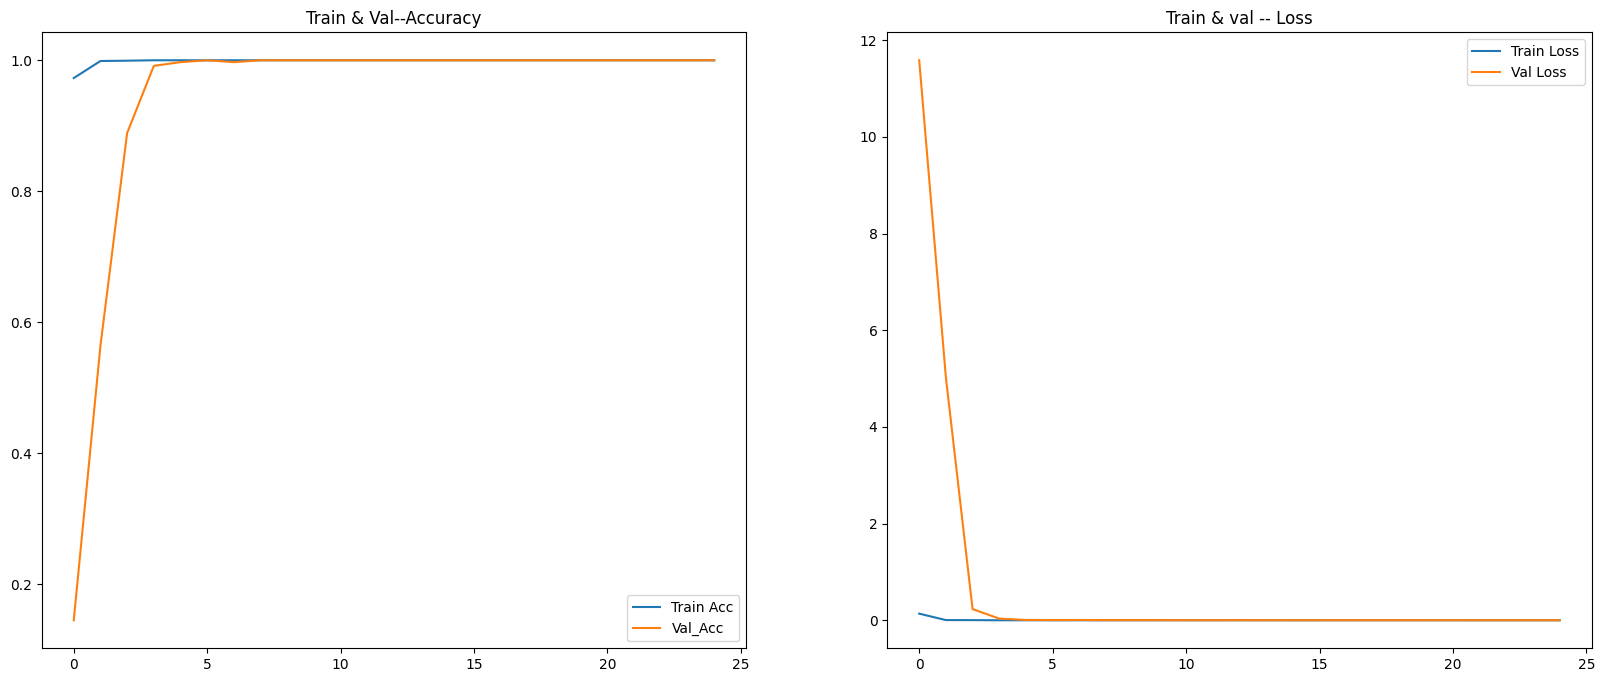

In [43]:
graph_display(history)

1/1 [==============================] - 0s 480ms/step


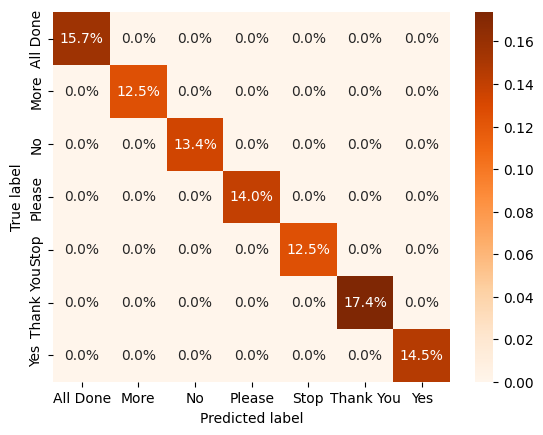

In [44]:
import seaborn as sns

# Get the true labels and predicted labels
y_true = []
y_pred = []
for x, y in val_path:
    y_true.extend(y.numpy())
    y_pred.extend(tf.argmax(model.predict(x), axis=-1).numpy())

# Generate the confusion matrix
cm = tf.math.confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_norm = cm / tf.reduce_sum(cm)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, cmap='Oranges', annot=True, fmt='.1%', xticklabels=name_train, yticklabels=name_train)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


saving the model

1/1 [==============================] - 0s 124ms/step


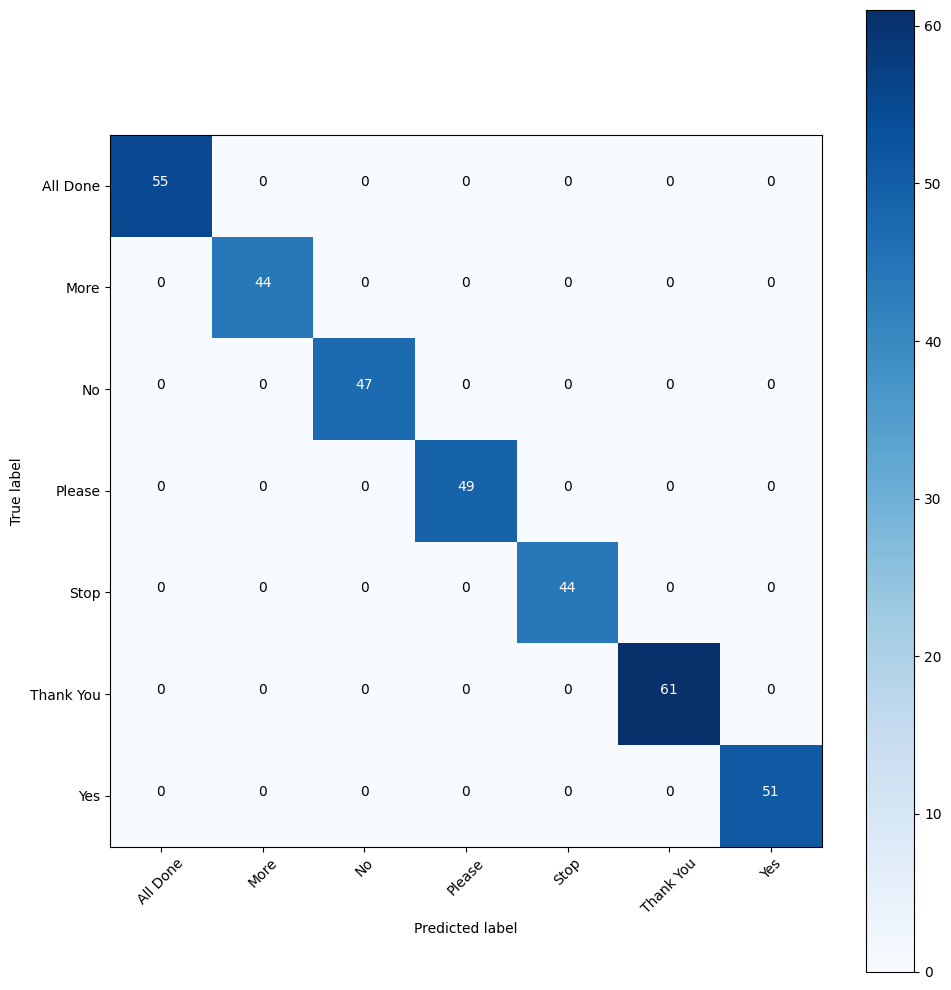

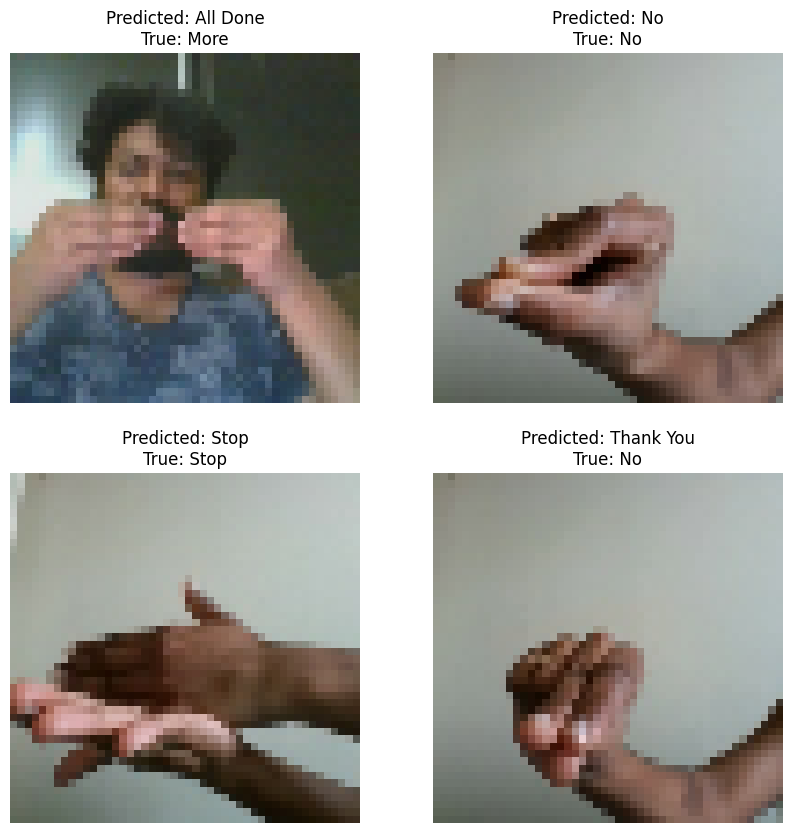

In [45]:
from sklearn.metrics import confusion_matrix
import itertools

# Get the true labels and predicted labels for the validation dataset
y_true = []
y_pred = []

for images, labels in val_path:
  y_true.extend(labels)
  y_pred.extend(np.argmax(model.predict(images), axis=-1))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, name_train)

# Display some images and their predicted labels alongside the true labels
plt.figure(figsize=(10, 10))
for images, labels in val_path.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_label = name_train[y_pred[i]]
    true_label = name_train[labels[i]]
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis("off")
